# Import libraries

In [30]:
import sys
sys.path.append("../scripts")


In [2]:
from fetch_data import DataLoader

df = DataLoader.read_csv("../data/Debernardi et al 2020 data.csv")

Pandas: CSV read from: ../data/Debernardi et al 2020 data.csv


# Dataset understanding

In [3]:
from exploration import Analysis
analyzer = Analysis()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

In [5]:
print(f"Rows: {df.shape[0]}\tColumns: {df.shape[1]}")

Rows: 590	Columns: 14


In [6]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [7]:
analyzer.percent_missing(df)

The dataset contains 15.7 % missing values.


In [8]:
missing_with_count, cols_with_missing = analyzer.get_missing_entries_count(df)

In [9]:
missing_with_count

stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
REG1A                      284
dtype: int64

In [10]:
analyzer.get_univariate_analysis(df)

,count,mean,std,min,25%,50%,75%,max,mode,CoV,skew,kurtosis,iqr,missing_counts
age,590.0,59.079661,13.109520,26.000000,50.000000,60.000000,69.000000,89.000000,68.000000,0.221896,-0.216832,-0.511899,19.000000,0
diagnosis,590.0,2.027119,0.804873,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.397053,-0.049186,-1.454333,2.000000,0
plasma_CA19_9,350.0,654.002944,2430.317642,0.000000,8.000000,26.500000,294.000000,31000.000000,9.000000,3.716065,8.018985,81.629774,286.000000,240
creatinine,590.0,0.855383,0.639028,0.056550,0.373230,0.723840,1.139482,4.116840,0.576810,0.747067,1.466413,2.739650,0.766253,0
LYVE1,590.0,3.063530,3.438796,0.000129,0.167179,1.649862,5.205037,23.890323,0.000814,1.122495,1.394014,2.419378,5.037858,0
REG1B,590.0,111.774090,196.267110,0.001104,10.757216,34.303353,122.741013,1403.897600,1.769536,1.755927,3.333925,13.077588,111.983796,0
TFF1,590.0,597.868722,1010.477245,0.005293,43.961000,259.873974,742.736000,13344.300000,0.024701,1.690132,5.158302,47.635879,698.775000,0
REG1A,306.0,735.281222,1477.247724,0.000000,80.692000,208.538500,649.000000,13200.000000,0.000000,2.009092,4.469123,25.538351,568.308000,284


The above output tells me that the feature are not normally distributed

In [18]:
from visualization import Plotters
plotters = Plotters(w=7, h=5)

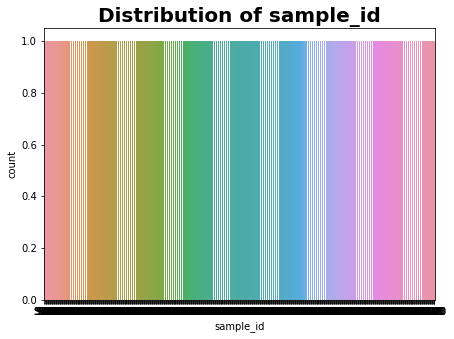

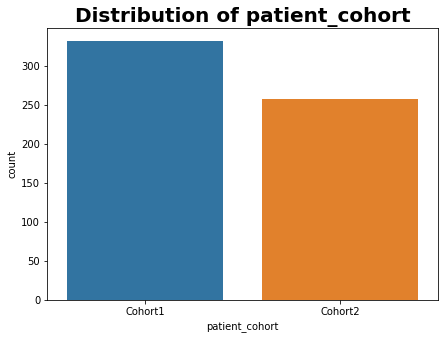

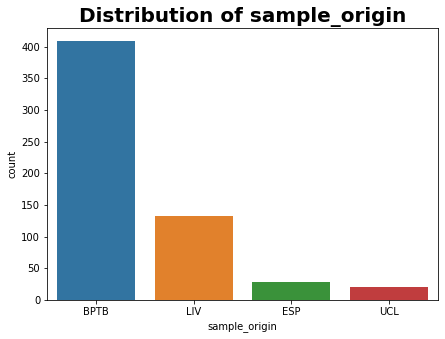

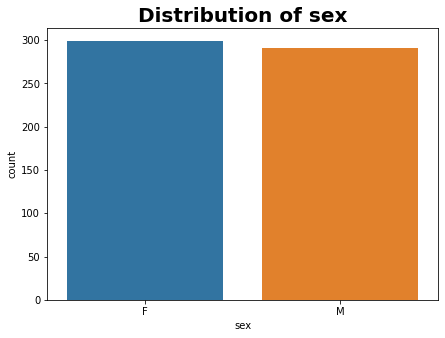

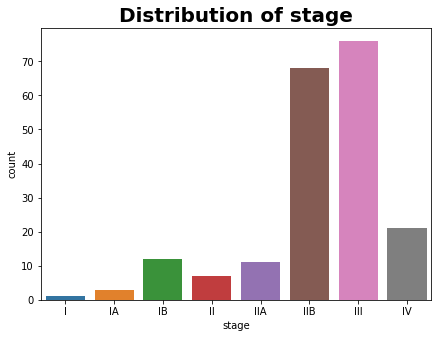

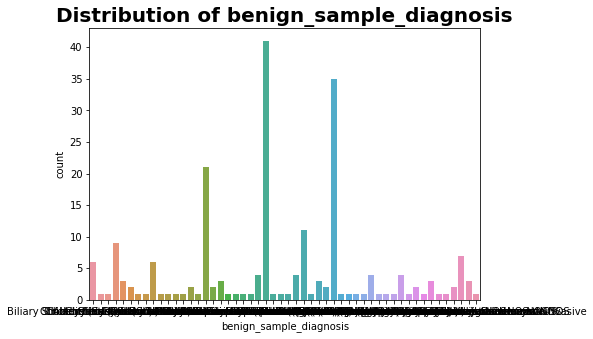

In [38]:
from cleaning import CleanDataFrame
for col in CleanDataFrame.get_categorical_columns(df):
    plotters.plot_count(df, col)
    


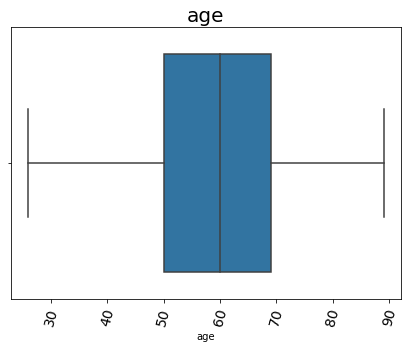

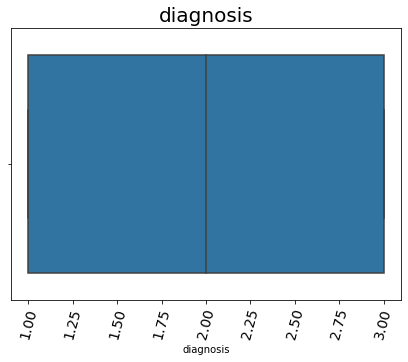

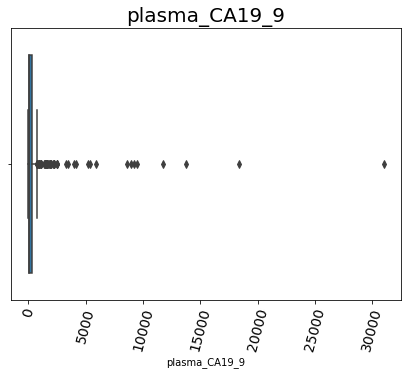

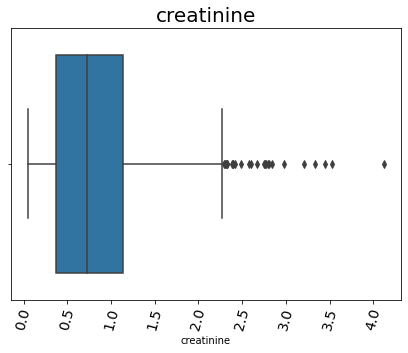

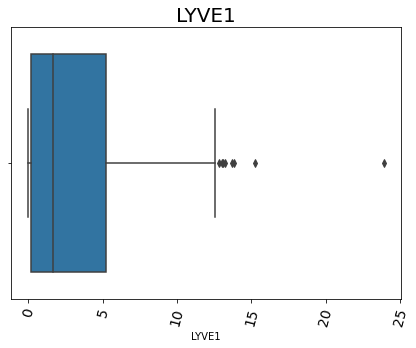

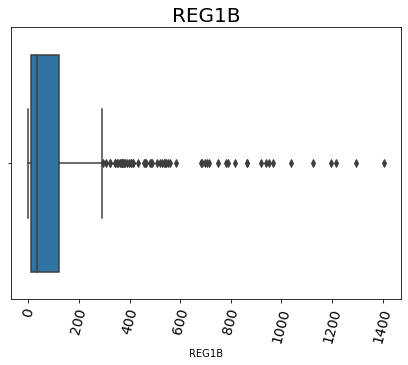

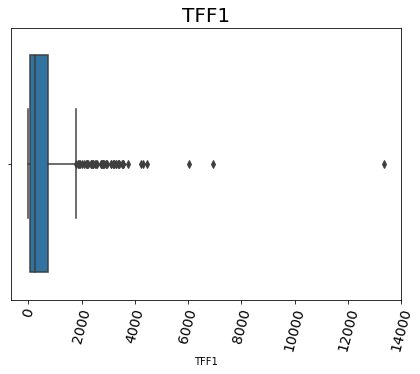

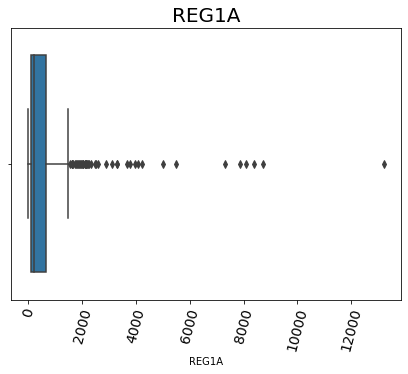

In [39]:
from cleaning import CleanDataFrame
for col in CleanDataFrame.get_numerical_columns(df):
    plotters.plot_box(df, x_col=col, title=col)
    


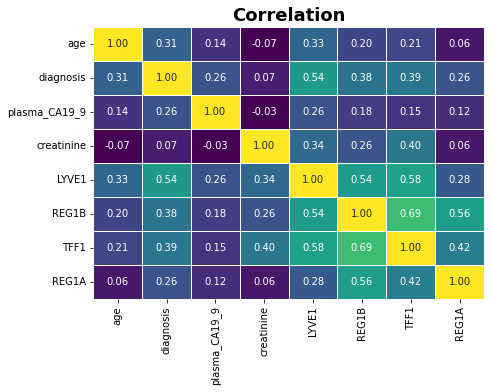

In [40]:
plotters.plot_heatmap(df.corr(), "Correlation")